In [1]:
import sympy
from sympy import symbols, Symbol, simplify, Function, expand_trig
from sympy import cos,sin
from sympy import diff, integrate
from sympy import python, latex
from sympy import Matrix
from sympy.physics.vector import init_vprinting, vlatex
init_vprinting(use_latex='mathjax', pretty_print=False)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline
# --- local packages
import fem
from fem.frame2d import *
from fem.fem_sympy import *

In [2]:
s = Symbol('s')
x = Symbol('x')
L = Symbol('L')
EI=Symbol('EI') 
EA=Symbol('EA') 
rho = Symbol('rho')
A = Symbol('A')
m = Symbol('m')
T=Symbol('T')   # Axial load
u1,u2,u3,u4,u5,u6 = symbols('u_1, u_2, u_3, u_4, u_5, u_6')

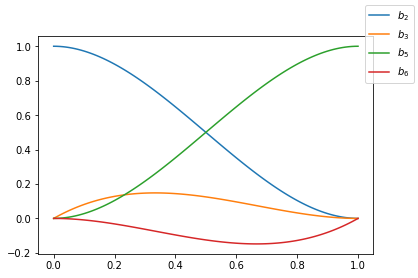

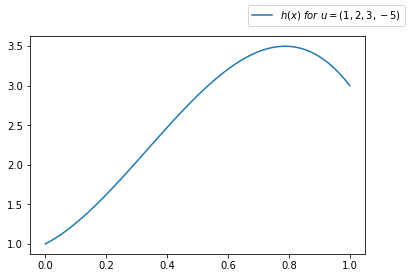

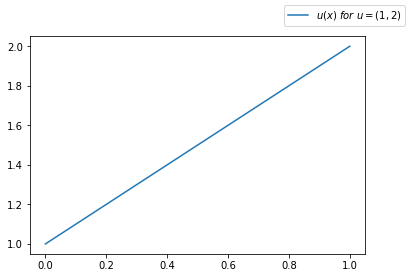

In [3]:
# --- Visualize shape functions
vx = np.linspace(0,1,100)
fig,ax = plt.subplots(1,1)
ax.plot(vx, b2(vx),   label=r'$b_2$')
ax.plot(vx, b3(vx,1), label=r'$b_3$')
ax.plot(vx, b5(vx),   label=r'$b_5$')
ax.plot(vx, b6(vx,1), label=r'$b_6$')
fig.legend()

fig,ax = plt.subplots(1,1)
ax.plot(vx, h(vx,1,2,3,-5,1),   label=r'$h(x)\ for\ u=(1,2,3,-5)$')
fig.legend()

fig,ax = plt.subplots(1,1)
ax.plot(vx, uax(vx,1,2,1),   label=r'$u(x)\ for\ u=(1,2)$')
fig.legend()



In [4]:
# --- Look at properties
print('h in polynomial form')
h(x, u2, u3,u5,u6,L).simplify().expand().collect(x)
print('u in polynomial form')
uax(x, u1, u4, L).simplify().expand().collect(x)

D0 = []
DL = []
V0 = []
VL = []
for b in [b1, b2, lambda s:b3(s,L), b4, b5, lambda s:b6(s,L)]:
    D0.append(b(s).diff(s).subs([(s,0)]))
    DL.append(b(s).diff(s).subs([(s,1)]))
    V0.append(b(0))
    VL.append(b(1))
#print('Values at start points ')
#V0
#print('Values at end points ')
#VL
print('Derivatives at start points ')
D0
print('Derivatives at end points ')
DL

print('Integrals of b functions')
I = []
for b in [b1, b2, lambda s:b3(s,L), b4, b5, lambda s:b6(s,L)]:
    I.append(integrate(b(s),(s,0,1)))
I

h in polynomial form


u_2 + u_3*x + x**3*(u_3/L**2 + u_6/L**2 + 2*u_2/L**3 - 2*u_5/L**3) + x**2*(-2*u_3/L - u_6/L - 3*u_2/L**2 + 3*u_5/L**2)

u in polynomial form


u_1 + x*(-u_1/L + u_4/L)

Derivatives at start points 


[-1, 0, L, 1, 0, 0]

Derivatives at end points 


[-1, 0, 0, 1, 0, L]

Integrals of b functions


[1/2, 1/2, L/12, 1/2, 1/2, -L/12]

In [5]:
# --- Define Stiffness matrix based on Strain energy

UB = frame2d_U_B(h,x,L,EI)
UG = frame2d_U_G(h,x,L,T)
UA = frame2d_U_A(uax,x,L,EA)
#UB.simplify()

Ke= zeros(6,6)

u=[u1,u2,u3,u4,u5,u6]
            
Ke= stiffnessMatrixFromPot(UB+UA, u)
Kg= stiffnessMatrixFromPot(UG, u)
            
Ke
Kg

print(python(Kg))
print(python(Ke))

Matrix([
[ EA/L,           0,          0, -EA/L,           0,          0],
[    0,  12*EI/L**3,  6*EI/L**2,     0, -12*EI/L**3,  6*EI/L**2],
[    0,   6*EI/L**2,     4*EI/L,     0,  -6*EI/L**2,     2*EI/L],
[-EA/L,           0,          0,  EA/L,           0,          0],
[    0, -12*EI/L**3, -6*EI/L**2,     0,  12*EI/L**3, -6*EI/L**2],
[    0,   6*EI/L**2,     2*EI/L,     0,  -6*EI/L**2,     4*EI/L]])

Matrix([
[0,          0,        0, 0,          0,        0],
[0,  6*T/(5*L),     T/10, 0, -6*T/(5*L),     T/10],
[0,       T/10, 2*L*T/15, 0,      -T/10,  -L*T/30],
[0,          0,        0, 0,          0,        0],
[0, -6*T/(5*L),    -T/10, 0,  6*T/(5*L),    -T/10],
[0,       T/10,  -L*T/30, 0,      -T/10, 2*L*T/15]])

T = Symbol('T')
L = Symbol('L')
e = MutableDenseMatrix([[0, 0, 0, 0, 0, 0], [0, 6*T/(5*L), T/10, 0, -6*T/(5*L), T/10], [0, T/10, 2*L*T/15, 0, -T/10, -L*T/30], [0, 0, 0, 0, 0, 0], [0, -6*T/(5*L), -T/10, 0, 6*T/(5*L), -T/10], [0, T/10, -L*T/30, 0, -T/10, 2*L*T/15]])
EA = Symbol('EA')
L = Symbol('L')
EI = Symbol('EI')
e = MutableDenseMatrix([[EA/L, 0, 0, -EA/L, 0, 0], [0, 12*EI/L**3, 6*EI/L**2, 0, -12*EI/L**3, 6*EI/L**2], [0, 6*EI/L**2, 4*EI/L, 0, -6*EI/L**2, 2*EI/L], [-EA/L, 0, 0, EA/L, 0, 0], [0, -12*EI/L**3, -6*EI/L**2, 0, 12*EI/L**3, -6*EI/L**2], [0, 6*EI/L**2, 2*EI/L, 0, -6*EI/L**2, 4*EI/L]])


In [6]:
# --- Interpolation matrix from nodal DOF to deflections
NN = zeros(2,6)
NN[0,0]=b1(x/L)
NN[0,3]=b4(x/L)
NN[1,1]=b2(x/L)
NN[1,2]=b3(x/L,L)
NN[1,4]=b5(x/L)
NN[1,5]=b6(x/L,L)

NN

Ke = stiffnessMatrixFromShapeFunctions(NN, x, L, EI) # TODO missing EA
Ke1,Me1,Kg1=frame2d_KeMe(EA, EI, L, m,T)
Ke1=Matrix(Ke1)
Ke-Ke1

Matrix([
[1 - x/L,                             0,              0, x/L,                         0,                 0],
[      0, 1 - 3*x**2/L**2 + 2*x**3/L**3, x*(1 - x/L)**2,   0, 3*x**2/L**2 - 2*x**3/L**3, x**2*(-1 + x/L)/L]])

Matrix([
[-EA/L, 0, 0,  EA/L, 0, 0],
[    0, 0, 0,     0, 0, 0],
[    0, 0, 0,     0, 0, 0],
[ EA/L, 0, 0, -EA/L, 0, 0],
[    0, 0, 0,     0, 0, 0],
[    0, 0, 0,     0, 0, 0]])

In [9]:
from fem.frame2d import *
from fem.fem_sympy import *
# --- Mass matrix

Me= massMatrixFromShapeFunctions(NN, x, L, m)
Ke1,Me1,Kg1=frame2d_KeMe(EA, EI, L, m,T)

Me1=Matrix(Me1)
Me1-Me

#print(python(M))

Matrix([
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])

In [30]:
# --- latex export
from fem.fem_sympy import *
print(cleantex(latex(Me/m)))
print(cleantex(latex(Matrix(Ke1))))
print(cleantex(latex(Matrix(Kg)/T)))
print(cleantex(latex(Matrix(I))))

\begin{bmatrix}
\frac{1}{3} & 0 & 0 & \frac{1}{6} & 0 & 0\\ 
0 & \frac{13}{35} & \frac{11 L}{210} & 0 & \frac{9}{70} & - \frac{13 L}{420}\\ 
0 & \frac{11 L}{210} & \frac{L^{2}}{105} & 0 & \frac{13 L}{420} & - \frac{L^{2}}{140}\\ 
\frac{1}{6} & 0 & 0 & \frac{1}{3} & 0 & 0\\ 
0 & \frac{9}{70} & \frac{13 L}{420} & 0 & \frac{13}{35} & - \frac{11 L}{210}\\ 
0 & - \frac{13 L}{420} & - \frac{L^{2}}{140} & 0 & - \frac{11 L}{210} & \frac{L^{2}}{105}
\end{bmatrix}

\begin{bmatrix}
\frac{EA}{L} & 0 & 0 & - \frac{EA}{L} & 0 & 0\\ 
0 & \frac{12 EI}{L^{3}} & \frac{6 EI}{L^{2}} & 0 & - \frac{12 EI}{L^{3}} & \frac{6 EI}{L^{2}}\\ 
0 & \frac{6 EI}{L^{2}} & \frac{4 EI}{L} & 0 & - \frac{6 EI}{L^{2}} & \frac{2 EI}{L}\\ 
- \frac{EA}{L} & 0 & 0 & \frac{EA}{L} & 0 & 0\\ 
0 & - \frac{12 EI}{L^{3}} & - \frac{6 EI}{L^{2}} & 0 & \frac{12 EI}{L^{3}} & - \frac{6 EI}{L^{2}}\\ 
0 & \frac{6 EI}{L^{2}} & \frac{2 EI}{L} & 0 & - \frac{6 EI}{L^{2}} & \frac{4 EI}{L}
\end{bmatrix}

\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0\\ 
0